<a href="https://colab.research.google.com/github/abn15/time-series-forecasting/blob/main/LSTMonGoodsProduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LSTM FORECASTING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
# index frequency represents the frequency or intervals at which the data is collected or observed
df.index.freq='MS'
#MS stands for month start

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


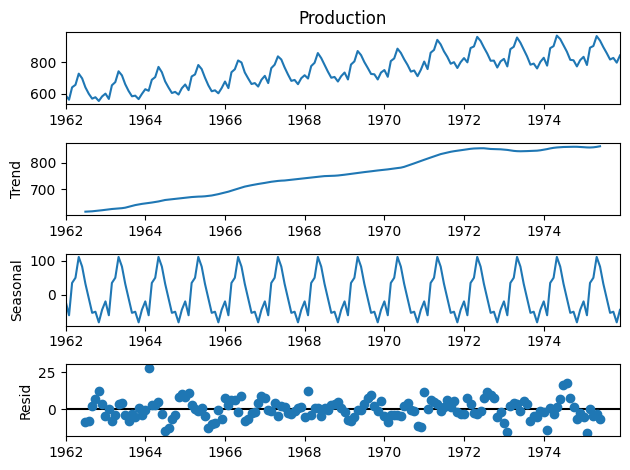

In [ ]:
results = seasonal_decompose(df['Production'])
results.plot();

In [ ]:
len(df)

168

In [ ]:

train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #scaling into a specific numerical range

In [ ]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)


In [ ]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
# Define the number of time steps in each input sequence
n_input = 3

# Define the number of features in the input data
n_features = 1

# Create a TimeseriesGenerator object
# using the scaled training data as both the input and targets
# with a sequence length of n_input
# and a batch size of 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the model
model = Sequential()

# Add an LSTM layer with 100 units and 'relu' activation function
# Specify the input shape as (n_input, n_features)
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))

# Add a Dense layer with 1 unit (output layer)
model.add(Dense(1))

# Compile the model with 'adam' optimizer and 'mse' loss function
model.compile(optimizer='adam', loss='mse')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 3ms/step - loss: 0.0586
Epoch 2/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0224
Epoch 3/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0167
Epoch 4/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0109
Epoch 5/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0090
Epoch 6/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 7/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 8/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0064
Epoch 9/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 10/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0072
Epoch 11/50
144/144 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 12/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0038
Epoch 13/50
144/144 [====

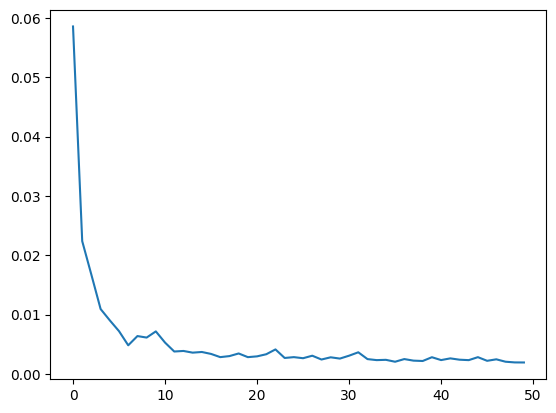

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:

model.predict(last_train_batch)

1/1 [==============================] - 0s 137ms/step


array([[0.6434243]], dtype=float32)

In [ ]:

scaled_test[0]


array([0.67548077])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 14ms/step


In [ ]:
test_predictions


[array([0.6434243], dtype=float32),
 array([0.60486066], dtype=float32),
 array([0.78687096], dtype=float32),
 array([0.8473426], dtype=float32),
 array([0.96640944], dtype=float32),
 array([0.94918966], dtype=float32),
 array([0.87665963], dtype=float32),
 array([0.77746224], dtype=float32),
 array([0.66645336], dtype=float32),
 array([0.6319221], dtype=float32),
 array([0.5752287], dtype=float32),
 array([0.61097836], dtype=float32)]

In [ ]:
test.head()


,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)


In [ ]:
test['Predictions'] = true_predictions


<ipython-input-41-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

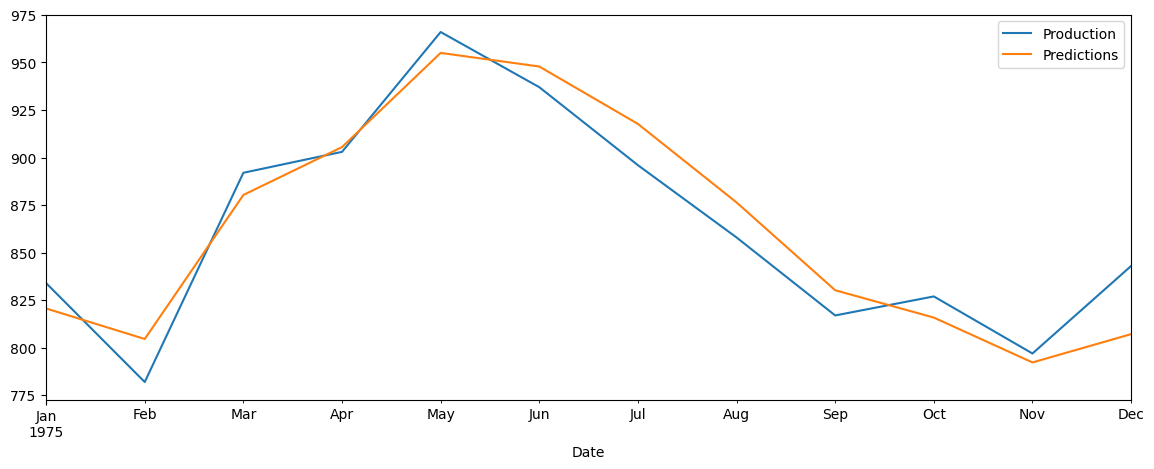

In [ ]:
test.plot(figsize=(14,5))


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

17.04255520424131
